## OpenStreetMap

### Using OpenStreetMap Python Package (OSMPythonTools)

Install using `pip install OSMPythonTools` (in the Anaconda Prompt or the Terminal in Jupyter Notebook) 

More documentation examples at https://wiki.openstreetmap.org/wiki/OSMPythonTools

Sourcecode : https://github.com/mocnik-science/osm-python-tools


In [1]:
from collections import OrderedDict
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
from OSMPythonTools.data import Data, dictRangeYears, ALL
import requests
import urllib.parse

In [2]:
nominatim = Nominatim()
place = nominatim.query("13 computing drive, Singapore")

In [3]:
place.toJSON()

[{'place_id': 221793905,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 54619721,
  'lat': '1.29501685',
  'lon': '103.77378505004238',
  'class': 'building',
  'type': 'yes',
  'place_rank': 30,
  'importance': 8.432822156095243e-05,
  'addresstype': 'building',
  'name': 'COM1',
  'display_name': 'COM1, 13, Computing Drive, Queenstown, Southwest, Singapore, 117417, Singapore',
  'boundingbox': ['1.2945491', '1.2954834', '103.7735116', '103.7743069']}]

In [4]:
place.toJSON()[0]["type"]

'yes'

In [5]:
place.displayName()

'COM1, 13, Computing Drive, Queenstown, Southwest, Singapore, 117417, Singapore'

In [6]:
lat = place.toJSON()[0]['lat']
lat

'1.29501685'

In [7]:
lon = place.toJSON()[0]['lon']
lon

'103.77378505004238'

### More interesting Analysis...

How many bus stops are there in Beijing currently?

In [8]:
nominatim = Nominatim()
areaId = nominatim.query('Beijing, china').areaId()
areaId

3600912940

In [9]:
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"highway"="bus_stop"', out='count')
result = overpass.query(query)
result.countElements()

19676

In [10]:
#this is the underlying query
query

'area(3600912940)->.searchArea;(node["highway"="bus_stop"](area.searchArea);); out count;'

How many bus stops are there in Beijing in 2018?

In [11]:
result = overpass.query(query, date='2018-01-01T00:00:00Z', timeout=60)
result.countElements()

4881

How many bus stops are there in Beijing & Singapore from 2018 to 2020?

In [12]:
dimensions = OrderedDict([
    ('year', dictRangeYears(2018, 2021, 1)),
    ('city', OrderedDict({
        'Beijing, China': 'Beijing, China',
        'Singapore': 'Singapore',
    })),
])
dimensions

OrderedDict([('year',
              OrderedDict([(2018, '2018-01-01T00:00:00Z'),
                           (2019, '2019-01-01T00:00:00Z'),
                           (2020, '2020-01-01T00:00:00Z')])),
             ('city',
              OrderedDict([('Beijing, China', 'Beijing, China'),
                           ('Singapore', 'Singapore')]))])

In [13]:
#this query takes very long to execute (for the first time)!
#results will be stored in the cache folder (delete the folder if want to clear cache)
nominatim = Nominatim()
overpass = Overpass()
def fetch(year, city):
    areaId = nominatim.query(city).areaId()
    query = overpassQueryBuilder(area=areaId, elementType='node', selector='"highway"="bus_stop"', out='count')
    return overpass.query(query, date=year, timeout=60).countElements()
data = Data(fetch, dimensions)

In [14]:
#can get pandas DF
data.getDataFrame()

value
year city                 
2018 Beijing, China   4881
     Singapore        5064
2019 Beijing, China   4967
     Singapore        5086
2020 Beijing, China   5097
     Singapore        5120

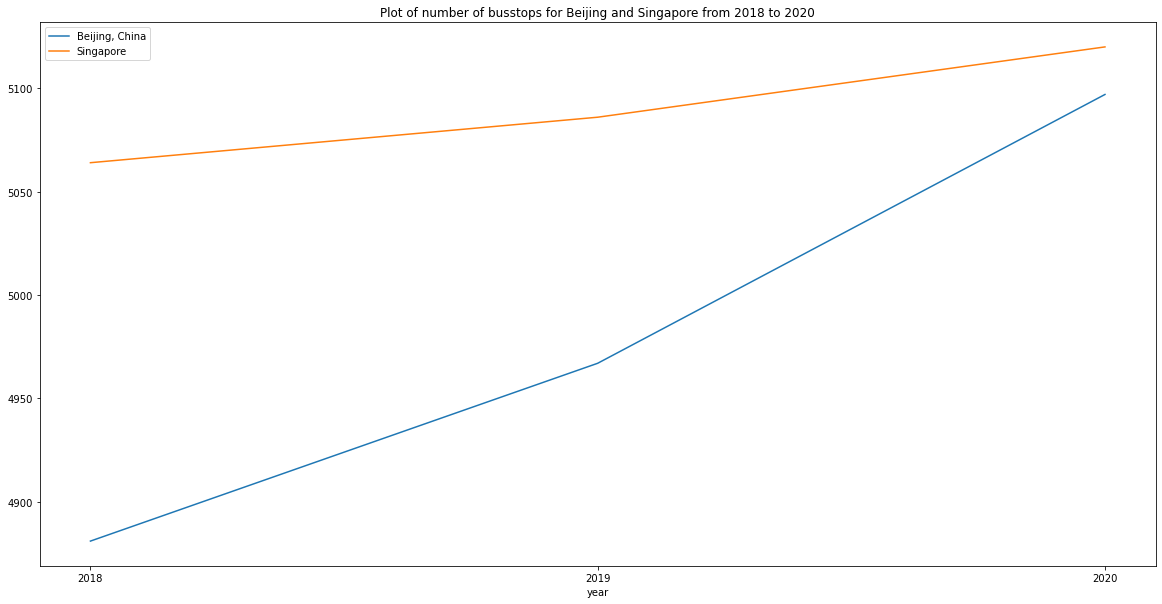

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
data.plot(city=ALL, 
          plotTitle="Plot of number of busstops for Beijing and Singapore from 2018 to 2020", 
          showPlot=False)
plt.xticks([2018, 2019, 2020])
plt.rc('axes', titlesize=22)
plt.savefig("busstops_beijing_singapore.png")

#reset to the original figure size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [16]:
#can get the csv here
csv_data = data.select(city=ALL).getCSV()
csv_data

'year,"Beijing, China",Singapore\r\n2018,4881,5064\r\n2019,4967,5086\r\n2020,5097,5120\r\n'

In [17]:
#write to csv file
csv_file = open("busstops_beijing_singapore.csv", "w")
csv_file.write(csv_data)
csv_file.close()

#### ❓Q1. What is the number of schools (college, university) in Beijing during 2020-01-01?
Hint: 
https://wiki.openstreetmap.org/wiki/Map_features

To specify multiple selectors, you can write it as `selector='"key"~"A|B"'` where key is the map feature and A and B are the 2 wanted value (union)

In [18]:
#TODO


### Access API during without using package

https://wiki.openstreetmap.org/wiki/Overpass_API

In [20]:
url = "https://nominatim.openstreetmap.org/search?q=13%20computing%20drive,%20Singapore&format=json&addressdetails=1"
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
r = requests.get(url)
r.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
lat = r.json()[0]['lat']
lat

In [ ]:
lon = r.json()[0]['lon']
lon

#### ❓Q2. Try using the OpenStreetMap to find the lat/long coordinates of your current location/hometown?

In [ ]:
#TODO


### Possible to do a reverse geocoding search

In [ ]:
url = f"https://nominatim.openstreetmap.org/reverse?lat={float(lat)}&lon={float(lon)}&format=json&addressdetails=1"
url

In [ ]:
r = requests.get(url)
r.json()

### Access OpenStreetMap OpenPass API 

First get the Area Id

In [ ]:
url = "https://nominatim.openstreetmap.org/search?q=Beijing,China&format=json"
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
r = requests.get(url)
results = r.json()
results

In [ ]:
#check implementation in:
#https://github.com/mocnik-science/osm-python-tools/blob/master/OSMPythonTools/nominatim.py
for result in results:
    if result['osm_type'] == 'relation':
        print(result)
        beijing_area_id = 3600000000 + int(result['osm_id'])
beijing_area_id

In [ ]:
#there are multiple openpass server 
#(results might be different as the data might be slightly different)

url = "http://overpass-api.de/api/interpreter"
# url = "https://overpass.kumi.systems/api/interpreter"


#find busstops in Beijing during 2020-01-01
query1 = "[out:json][timeout:60][date:'2020-01-01T00:00:00Z'];area(" + str(beijing_area_id) + ")->.searchArea;(node['highway'='bus_stop'](area.searchArea);); out count;"
query1 = urllib.parse.urlencode({'data': query1})
url = url + "?" + query1
url

In [ ]:
#if we call too many times, we might hit the rate limit
r = requests.get(url)
r

In [ ]:
result_json = r.json()
result_json

In [ ]:
#parse the json manually
count = result_json['elements'][0]['tags']['total']
count

#### ❓Q3. What is the number of schools (college, university) in Beijing during 2020-01-01 (without using the OSMPythonTools)?
Hint: 
https://wiki.openstreetmap.org/wiki/Map_features

To specify multiple selectors, you can write it as `selector='"key"~"A|B"'` where key is the map feature and A and B are the 2 wanted value (union)

In [ ]:
#TODO
